In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from bayesianmm.data import mean_match
from bayesianmm.visualize import draw

### GES in causallearn

In [3]:
from causallearn.search.ScoreBased.GES import ges

In [4]:
p = 10
problem = mean_match(nnodes=p, sigma_square=.1*np.ones(p), S=5, DAG_type='random')

Observational Data

In [8]:
a = np.zeros((problem.nnodes,1))
X,_,_ = problem.sample(a,1000)
X = X - np.mean(X, axis=1).reshape(-1,1)	# need to rescale since ges assume sample mean = 0

In [9]:
%%capture
Record = ges(X.T, 'local_score_BIC')

there are no undirected edges
plotting...


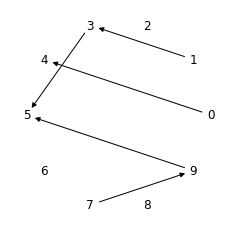

In [10]:
# ground truth DAG
draw(problem.DAG)

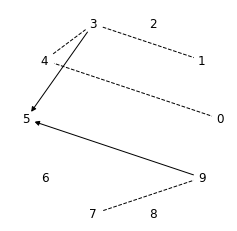

In [11]:
plt.figure(figsize=(4,4))
nw_ax = plt.subplot2grid((4, 4), (0, 0), colspan=4, rowspan=4)

d = nx.DiGraph()
d.add_nodes_from(range(problem.nnodes))
e = nx.Graph()

for i in range(problem.nnodes):
	for j in range(problem.nnodes):
		if Record['G'].graph[j, i] == 1 and Record['G'].graph[i, j] == -1:
			d.add_edge(i, j)
		elif Record['G'].graph[j, i] == -1 and Record['G'].graph[i, j] == -1:
			e.add_edge(i, j)

pos = nx.circular_layout(d)
nx.draw(e, pos=pos, node_color='w', style='dashed')
nx.draw(d, pos=pos, node_color='w')
nx.draw_networkx_labels(d, pos=pos, labels={node: node for node in range(problem.nnodes)}, ax=nw_ax);

Interventional Data

In [8]:
a1 = np.random.uniform(-1, 1, (problem.nnodes,1))
X1,_,_ = problem.sample(a1,1000)
X1 = X1 - np.mean(X1, axis=1).reshape(-1,1)	# need to rescale since ges assume sample mean = 0

a2 = np.random.uniform(-1, 1, (problem.nnodes,1))
X2,_,_ = problem.sample(a2,1000)
X2 = X2 - np.mean(X2, axis=1).reshape(-1,1)	# need to rescale since ges assume sample mean = 0

XI = np.concatenate((X1, X2), axis=1)

In [13]:
%%capture
Record_I = ges(XI.T, 'local_score_BIC')

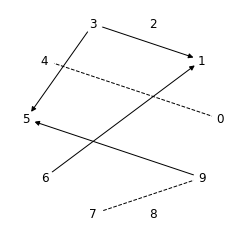

In [14]:
plt.figure(figsize=(4,4))
nw_ax = plt.subplot2grid((4, 4), (0, 0), colspan=4, rowspan=4)

d = nx.DiGraph()
d.add_nodes_from(range(problem.nnodes))
e = nx.Graph()

for i in range(problem.nnodes):
	for j in range(problem.nnodes):
		if Record_I['G'].graph[j, i] == 1 and Record_I['G'].graph[i, j] == -1:
			d.add_edge(i, j)
		elif Record_I['G'].graph[j, i] == -1 and Record_I['G'].graph[i, j] == -1:
			e.add_edge(i, j)

pos = nx.circular_layout(d)
nx.draw(e, pos=pos, node_color='w', style='dashed')
nx.draw(d, pos=pos, node_color='w')
nx.draw_networkx_labels(d, pos=pos, labels={node: node for node in range(problem.nnodes)}, ax=nw_ax);